### Monty Hall Problem 

 - Simulate three doors, one car, and two goats.
 - Simulate three players: the switcher, the conservative, and the newcomer. 
 - Record who wins.
 - Repeat it many times.
 - Which player do you want to be?
 
 - What would happen if you had 100 doors to choose from and the presenter opens 98 or them?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

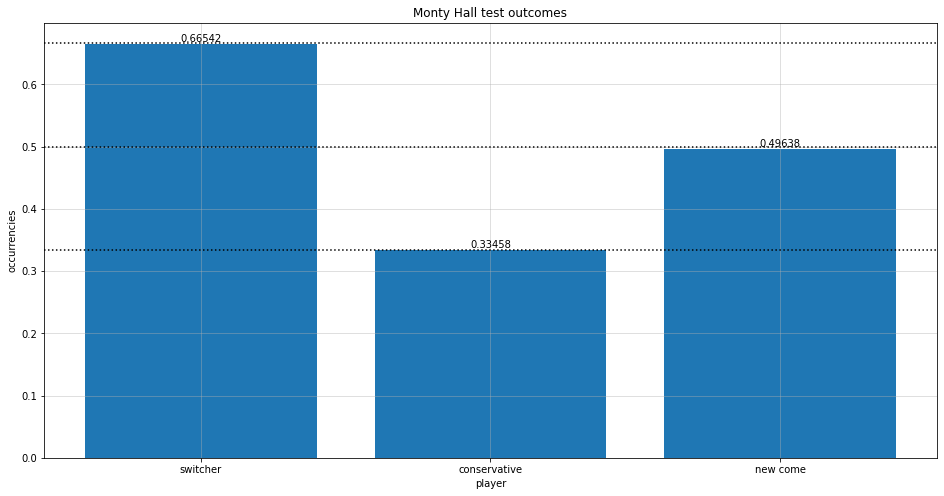

In [18]:
#1 = car, 0 = goat
tries = 100000

switcher = 0
conservative = 0
newcome = 0

#number of doors and opened doors
#can set n_doors = 3 for the first part of the exercise and n_doors = 100 for the last part
n_doors = 3
n_open = n_doors-2

for i in range(tries):
    doors = np.zeros([n_doors])
    
    #set door with car
    car = np.random.randint(0, n_doors)
    doors[car] = 1

    #set door chosen by player
    player = np.random.randint(0, n_doors)
    
    if(player == car):
        host = random.sample([i for i in range(len(doors)) if i not in [car]], n_open)
    else:
        host = random.sample([i for i in range(len(doors)) if i not in [player, car]], n_open)


    switcher = switcher + float(np.delete(doors, host+[player]))
    conservative = conservative + doors[player]
    newcome = newcome + random.choice(np.delete(doors, host))

probs = [switcher/tries, conservative/tries, newcome/tries]

plt.figure(figsize=(16, 8))
plt.xlabel("player")
plt.ylabel("occurrencies")

plt.grid(alpha = 0.5)
plt.title("Monty Hall test outcomes")
bars = plt.bar([0,1,2], probs);
plt.bar_label(bars)
plt.xticks([0,1,2], ['switcher', 'conservative', 'new come']);

for y in [1/3,1/2,2/3]:
    plt.axhline(y, ls='dotted',c='black')

plt.show()

Let's break it down:
Before a door is opened, the probability of finding a car is clearly 1/number_of_doors=1/3.

After one door has been opened:

Probability of car behind Door 1 = 1/3 
Probability of car behind Doors 2 or 3 = 2/3

But if the host opens Door 3 to show a goat, you now have prior information to update your probability of the car being behind Door 2. The probability of the car behind Door 1 is still 1/3, but the total probability must sum to unity, and you only have Door 2 left. 

Hence, with prior knowledge of Door 3 containing a goat, the probability of car behind Door 2 = 2/3.

So, switching doubles your chances. 
You should always switch!! 
But only because you had prior information. If someone walked in after the "bad" door was opened, then their probability of winning is the expected 1/number_of_doors = 1/2.

This actually becomes easier to understand as N increases. For N choices, revealing N-2 "answers" doesn't change the probability of your original door choice. It is still 1/N.

But it does change the probability of your knowledge of the other final remaining choice by (N-1) and it is (N-1)/N.
 
Therefore, by switching, you increase your chance of winning by a factor of (N-1). Shocking, but true.

- In the 3-door example, switching doubles your chance of winning (from 1/3 to 2/3).
- In a 100-door example, switching increases your chance of winning by a factor of 99.

This is an example of the use of conditional probability, where we have p(A|B) != p(A).

### PDF of the log

### Pdf of the log
1. Use `numpy` to draw $N$ (where $N$ is large...) random samples from a uniform distribution between $0.1$ and $10$, and store these samples as $x$.
2. Use matplotlib to make a histogram of these samples.
3. Compute the base-10 log of your array $x$, and store this as $y$.
4. Make another histogram for $y$. Using the equation to transform probability distributions, write what the theoretical pdf of $y$ is, and overplot it onto your histogram.
5. Compute the log of the mean of $x$ and the mean of $y$. Now compute the log of the median of $x$ and the median of $y$. 


In [20]:
N = 10000
x_min = 0.1
x_max = 10
x = np.random.uniform(x_min, x_max, N)
def p_x(x_min, x_max):
    return 1/(x_max - x_min)

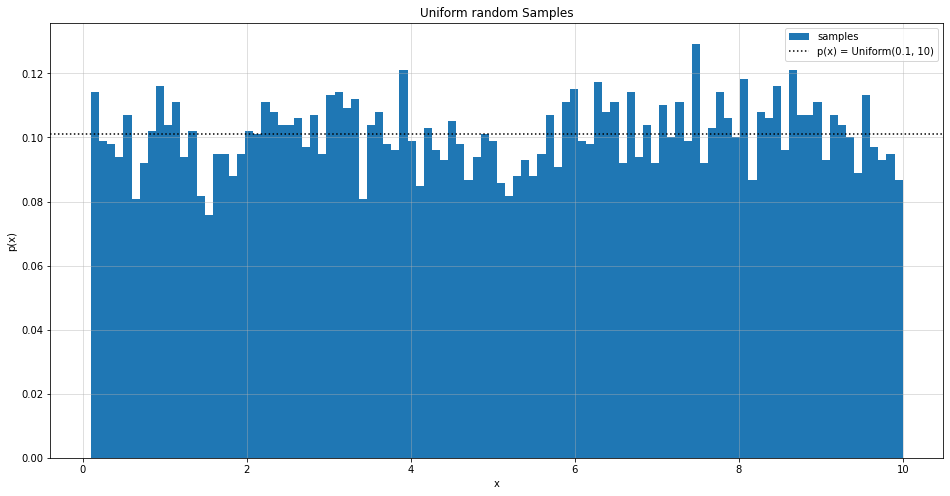

In [25]:
plt.figure(figsize=(16, 8))
plt.xlabel("x")
plt.ylabel("p(x)")

plt.grid(alpha = 0.5)
plt.title("Uniform random Samples")

plt.hist(x, density = "True", bins = 100, label = "samples")
plt.axhline(p_x(x_min, x_max), ls='dotted',c='black', label = r'p(x) = Uniform(0.1, 10)')
plt.legend()
plt.show()

In [27]:
y = np.log10(x)

def p_y(x, x_min, x_max):
    return x*p_x(x_min, x_max)*np.log(10)

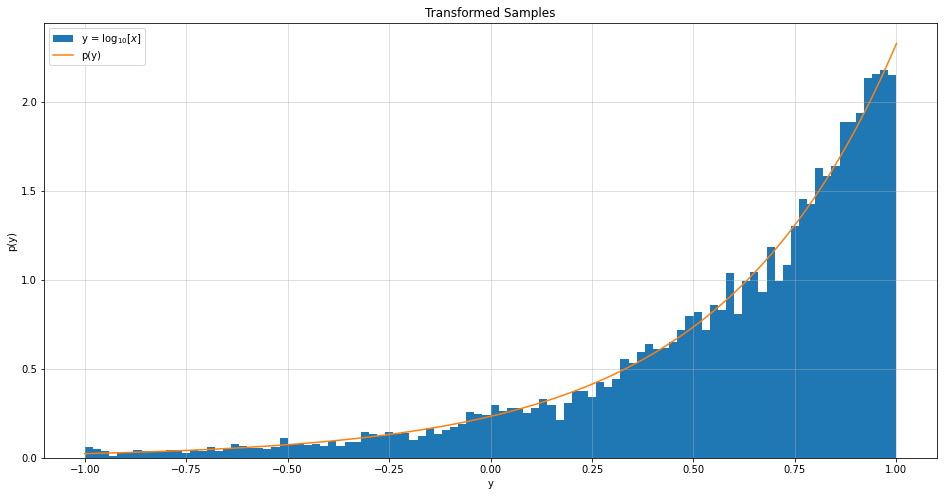

In [31]:
plt.figure(figsize=(16, 8))
plt.xlabel("y")
plt.ylabel("p(y)")

plt.grid(alpha = 0.5)
plt.title("Transformed Samples")
plt.hist(y, density = "True", bins = 100, label = r'y = $\log_{10}[x]$')
plt.plot(np.sort(y),np.sort(p_y(x, x_min, x_max)), label = 'p(y)')
plt.legend()
plt.show()

In [32]:
log_mean = np.log10(np.mean(x))
mean_log = np.mean(y)

log_median = np.log10(np.median(x))
median_log = np.median(y)

print("log_mean of x = "+ str(log_mean) + "    ..vs..    " + "mean of y (= log10(x)) = " + str(mean_log))
print("log_median of x = "+str(log_median) + "    ..vs..    "  + "median of y (= log10(x)) = " + str(median_log))

log_mean of x = 0.7064989920840236    ..vs..    mean of y (= log10(x)) = 0.5892564319640198
log_median of x = 0.7081760568423143    ..vs..    median of y (= log10(x)) = 0.7081760567534872


You should note that the means are different, but the medians (as it is a cumulative statistic) are the same. The mean is affected by the scale of the sample values, but the median only depends on the ordering of the samples. Monotonic transformations (like taking the log) do not change the ordering of samples.